# 1. Simple Linear Regression

In [ ]:
#conda install -c anaconda numpy
#conda install -c anaconda pandas
#conda install -c conda-forge matplotlib
#conda install -c anaconda seaborn
#conda install -c anaconda scikit-learn
#conda install -c anaconda statsmodels

# Import required packages 

In [6]:
# importing required packages
# data operation libraries

import numpy as np
import pandas as pd
# visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
#plt.style.use('seaborn-white')

Through out the code b represents intercept and  m represents the slope

## Load Datasets

In [26]:
tv_data = pd.read_csv('../data/tvmarketing.csv')


tv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB




tv_data

## Exploring and visualising the data 

In [8]:
# Display information
tv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [9]:
#for some statistical information about the dataframe.
tv_data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [10]:
# Display the first 2 rows
tv_data.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [11]:
# Display the first 6 rows
tv_data.tail(10)

,TV,Sales
190,39.5,10.8
191,75.5,9.9
192,17.2,5.9
193,166.8,19.6
194,149.7,17.3
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [10]:
# Check the shape of the DataFrame (rows, columns)
tv_data.shape

(200, 2)

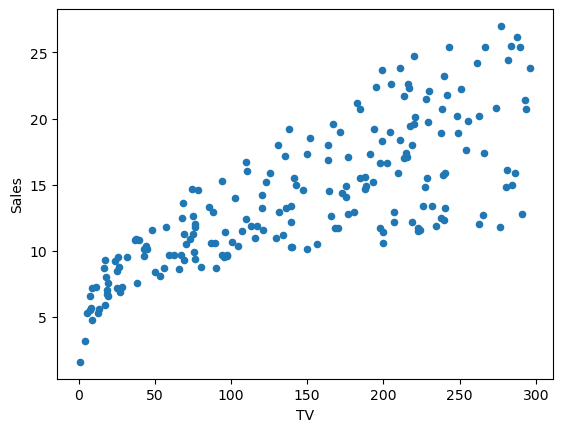

In [12]:
# Visualise the relationship between the features and the response using scatterplots
tv_data.plot(x='TV',y='Sales',kind='scatter')
plt.show()

## Model Building

## 1.Our own code 

The input = X (feature variable) and y (response variable) to be NumPy arrays.
However, X can be a dataframe as Pandas is built over NumPy.

In [14]:
y_trn = tv_data['Sales'].values
y_trn

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [15]:
X_trn = tv_data['TV'].values
X_trn

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [16]:

X_trn = tv_data['TV'].values
y_trn = tv_data['Sales'].values

### Splitting Data into Training and Testing Sets

In [19]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(X_trn, y_trn,  test_size=0.3, random_state =1)

In [20]:
X_trainnew.shape

(140,)

In [21]:
X_trainnew

array([139.2, 139.3,   5.4, 293.6, 281.4,   8.7,  80.2, 137.9, 227.2,
        31.5, 262.7, 213.5, 287.6,  11.7,  17.9, 209.6,  23.8,  76.4,
       250.9, 141.3, 187.8, 134.3, 239.8, 224. ,  75.5,  97.5,  75.3,
         8.4, 191.1, 175.1, 135.2, 266.9,  85.7, 139.5, 171.3, 187.9,
        38.2, 177. ,  38. , 168.4,  16.9, 237.4,  28.6, 197.6,  17.2,
       199.1, 193.2, 280.7,  57.5, 175.7, 230.1,   4.1, 120.5,  69. ,
       198.9, 206.8,  88.3,   0.7,  89.7, 239.3, 213.4, 217.7, 243.2,
       172.5, 104.6, 110.7, 156.6, 140.3, 117.2,  66.1,  97.2,  68.4,
        56.2, 222.4,  87.2, 228.3,   7.8, 199.8,  50. , 238.2, 121. ,
        48.3, 241.7, 286. , 131.1, 195.4, 177. , 163.5, 255.4,  76.4,
       216.4, 142.9,  27.5, 206.9,  62.3, 151.5, 284.3,  66.9,  44.7,
       265.2,  39.5, 292.9,  18.8,  75.1, 276.9,   8.6,  53.5, 220.3,
        44.5, 136.2,  13.2, 261.3, 102.7, 120.2,  94.2, 193.7,  76.3,
       197.6, 237.4, 199.8, 220.5, 149.8,  93.9, 184.9, 240.1, 296.4,
       218.4, 276.7,

In [22]:
y_trainnew

array([12.2, 13.4,  5.3, 20.7, 24.4,  7.2,  8.8, 19.2, 14.8,  9.5, 20.2,
       21.7, 26.2,  7.3,  8. , 15.9,  9.2,  9.4, 22.2, 15.5, 15.6, 11.2,
       12.3, 11.6,  9.9,  9.7, 11.3,  5.7, 17.3, 14.9, 17.2, 25.4, 13.3,
       10.3, 19. , 14.7,  7.6, 12.8, 10.9, 11.7,  8.7, 12.5,  7.3, 16.6,
        9.3, 18.3, 15.2, 16.1, 11.8, 14.1, 22.1,  3.2, 14.2,  9.3, 23.7,
       12.2, 12.9,  1.6, 10.6, 15.7, 17. , 19.4, 25.4, 14.4, 10.4, 16. ,
       10.5, 10.3, 11.9,  8.6,  9.6, 13.6,  8.7, 11.7, 10.6, 15.5,  6.6,
       10.6,  8.4, 20.7, 11.6, 11.6, 21.8, 15.9, 18. , 22.4, 17.1, 18. ,
       19.8, 11.8, 22.6, 15. ,  6.9, 12.9,  9.7, 18.5, 15. ,  9.7, 10.1,
       12.7, 10.8, 21.4,  7. , 12.6, 27. ,  4.8,  8.1, 24.7, 10.4, 13.2,
        5.6, 24.2, 14. , 13.2,  9.7, 19.2, 12. , 11.7, 18.9, 11.4, 20.1,
       10.1, 15.3, 20.7, 13.2, 23.8, 18. , 11.8, 12. , 10.8, 12.4,  9.7,
       11.4,  5.9, 11. , 19.6, 20.8,  8.8, 10.9, 14.7])

In [19]:
X_testnew.shape

(60,)

In [20]:
X_trainnew.mean()

np.float64(142.7185714285714)

In [21]:
X_trainnew

array([139.2, 139.3,   5.4, 293.6, 281.4,   8.7,  80.2, 137.9, 227.2,
        31.5, 262.7, 213.5, 287.6,  11.7,  17.9, 209.6,  23.8,  76.4,
       250.9, 141.3, 187.8, 134.3, 239.8, 224. ,  75.5,  97.5,  75.3,
         8.4, 191.1, 175.1, 135.2, 266.9,  85.7, 139.5, 171.3, 187.9,
        38.2, 177. ,  38. , 168.4,  16.9, 237.4,  28.6, 197.6,  17.2,
       199.1, 193.2, 280.7,  57.5, 175.7, 230.1,   4.1, 120.5,  69. ,
       198.9, 206.8,  88.3,   0.7,  89.7, 239.3, 213.4, 217.7, 243.2,
       172.5, 104.6, 110.7, 156.6, 140.3, 117.2,  66.1,  97.2,  68.4,
        56.2, 222.4,  87.2, 228.3,   7.8, 199.8,  50. , 238.2, 121. ,
        48.3, 241.7, 286. , 131.1, 195.4, 177. , 163.5, 255.4,  76.4,
       216.4, 142.9,  27.5, 206.9,  62.3, 151.5, 284.3,  66.9,  44.7,
       265.2,  39.5, 292.9,  18.8,  75.1, 276.9,   8.6,  53.5, 220.3,
        44.5, 136.2,  13.2, 261.3, 102.7, 120.2,  94.2, 193.7,  76.3,
       197.6, 237.4, 199.8, 220.5, 149.8,  93.9, 184.9, 240.1, 296.4,
       218.4, 276.7,

In [22]:
X_trainnew.shape

(140,)

In [23]:
X_trainnew.shape[0]

140

In [24]:
a = 5
a = a + 4
print(a)

9


In [25]:
a = 5
a += 4
print(a)

9


 However, it is worth noting that this implementation does not include any advanced features such as regularization or cross-validation, which may be necessary for more complex datasets.
 
Least square approach: In this approach, the goal is to minimize the sum of the squared residuals, which is the difference between the actual observed values and the predicted values from the linear model.

In [27]:
# Global variables to store slope and intercept
m = None
b = None

def fit(X_train, y_train):
    global m, b  # Declare global variables
    
    num = 0
    den = 0

    # Printing mean values
    print("xmean", X_train.mean())
    print("ymean", y_train.mean())

    #loop starts for i=0 to n=length of the training set
    for i in range(X_train.shape[0]):
        print(i)
        print("x=", X_train[i])
        print("y=", y_train[i])
        print("c", (X_train[i] - X_train.mean()))
        print("d", (y_train[i] - y_train.mean()))
        print("num", (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
        print("den", (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))
        
        num += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
        den += (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
        
        print("updated_numerator=", num)
        print("updated_denominator=", den)
        print('*******************************')

    print("final num=", num)
    print("final den=", den)
    
    m = num / den
    b = y_train.mean() - (m * X_train.mean())

    print("slope", m)
    print("Intercept", b)

def predict(X_test):
    global m, b  # Access global variables
    
    print("The input x values")
    print(X_test)

    # mx + b
    return m * X_test + b


In [28]:

# Representing LinearRegression as lr(Creating LinearRegression Object)
#lr = new_fun_LR()

# Fit the model using lr.fit()
fit(X_trainnew, y_trainnew)

xmean 142.7185714285714
ymean 13.79142857142857
0
x= 139.2
y= 12.2
c -3.51857142857142
d -1.5914285714285707
num 5.5995551020408
den 12.380344897959121
updated_numerator= 5.5995551020408
updated_denominator= 12.380344897959121
*******************************
1
x= 139.3
y= 13.4
c -3.418571428571397
d -0.3914285714285697
num 1.3381265306122265
den 11.686630612244683
updated_numerator= 6.937681632653026
updated_denominator= 24.066975510203804
*******************************
2
x= 5.4
y= 5.3
c -137.3185714285714
d -8.491428571428571
num 1166.0308408163262
den 18856.390059183665
updated_numerator= 1172.9685224489792
updated_denominator= 18880.457034693867
*******************************
3
x= 293.6
y= 20.7
c 150.88142857142861
d 6.908571428571429
num 1042.3751265306125
den 22765.205487755116
updated_numerator= 2215.3436489795918
updated_denominator= 41645.66252244898
*******************************
4
x= 281.4
y= 24.4
c 138.68142857142857
d 10.608571428571429
num 1471.2118408163265
den 19232.5

### Prediction

In [29]:
#printing the values in the X_testnew variable
X_testnew

array([210.8, 202.5,  95.7, 280.2, 253.8, 283.6, 163.3, 180.8,  70.6,
       215.4, 164.5,  69.2, 214.7, 109.8, 225.8, 125.7, 131.7, 290.7,
        25.6, 210.7, 100.4,  67.8,  25.1, 107.4, 112.9, 188.4,  43.1,
       248.8, 166.8, 240.1, 239.9, 234.5, 149.7, 170.2, 248.4, 184.9,
       222.4, 129.4, 216.8,  19.6,  13.1,  90.4,  18.7, 204.1,   7.3,
       147.3,  78.2, 228. , 205. , 229.5, 289.7, 123.1,  19.4, 182.6,
       265.6, 165.6, 218.5,  25. , 232.1,  43. ])

In [30]:
# Making predictions on the testing set
y_pred1 = predict(X_testnew)
print("Predicted values \n",y_pred1)

The input x values
[210.8 202.5  95.7 280.2 253.8 283.6 163.3 180.8  70.6 215.4 164.5  69.2
 214.7 109.8 225.8 125.7 131.7 290.7  25.6 210.7 100.4  67.8  25.1 107.4
 112.9 188.4  43.1 248.8 166.8 240.1 239.9 234.5 149.7 170.2 248.4 184.9
 222.4 129.4 216.8  19.6  13.1  90.4  18.7 204.1   7.3 147.3  78.2 228.
 205.  229.5 289.7 123.1  19.4 182.6 265.6 165.6 218.5  25.  232.1  43. ]
Predicted values 
 [17.06764591 16.66823297 11.52879892 20.4073156  19.1368937  20.57093054
 14.78184893 15.62398466 10.32093567 17.2890073  14.83959538 10.25356482
 17.25532187 12.20731971 17.78947654 12.97246017 13.26119242 20.91259704
  8.1554438  17.06283371 11.75497252 10.18619396  8.13138278 12.09182681
 12.35649804 15.98971218  8.99757953 18.89628349 14.95027608 18.47762173
 18.46799732 18.2081383  14.12738917 15.11389102 18.87703468 15.82128503
 17.62586159 13.15051172 17.35637816  7.86671155  7.55391828 11.2737521
  7.82340171 16.74522823  7.27481044 14.01189627 10.68666319 17.89534503
 16.78853807 1

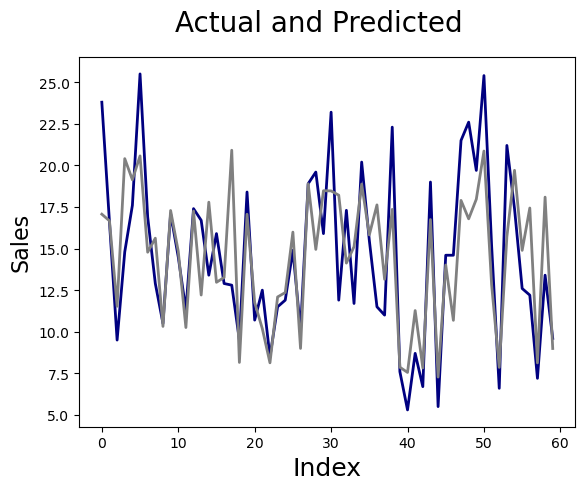

In [31]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(0,60,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_testnew, color="navy", linewidth=2, linestyle="-")
plt.plot(c,y_pred1, color="grey",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16) 
plt.show()

### Error metrics 

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
# Mease squared error.
mse = mean_squared_error(y_testnew, y_pred1)

In [33]:
#r2 score. Value ranges from 0 to 1
r_squared = r2_score(y_testnew, y_pred1)

In [34]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 10.571057434656952
r_square_value : 0.5750618604943312


# Calculating t-value, p-value with builtin function

In [23]:
import numpy as np
from scipy.stats import t
from sklearn.linear_model import LinearRegression

# Example data
x = X_trn.reshape(-1, 1)  # Reshape to column vector
y = y_trn

# Step 1: Fit linear regression model
model = LinearRegression().fit(x, y)

# Step 2: Extract coefficients
intercept = model.intercept_
coefficients = model.coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)

Intercept =  7.032593549127694
Coefficients =  [0.04753664]


In [36]:
# Step 3: Calculate residuals
y_pred = model.predict(x)
residuals = y - y_pred
print(residuals)

[ 4.12922549  1.25202595  1.44977624  4.26560543 -2.72721814 -0.24616232
  2.03404963  0.45350227 -2.64140866 -5.93041431 -1.57476548  0.16128975
  1.03603441 -1.96741599  2.26517814  6.07874691  2.24442223  3.99059583
  0.97787093  0.56525932  0.58540418 -5.81779199 -2.0600772  -2.38520856
 -0.29412625 -7.52997632  1.17442053 -2.54614092  0.04029031  0.11131964
  0.44392447 -0.49948025 -2.053155   -2.25832525 -2.08185004 -8.05149492
  5.67987712  4.11641941  1.01857725  3.62905243 -0.05876324  1.65342109
 -0.28935118 -3.96792445  0.27423678 -0.45625929 -0.6966302   4.76336641
 -3.03291826 -0.51279479 -5.13041431 -1.10527225  5.28047746  5.48721591
  0.67953101  7.21236867 -1.87961102 -0.30708398  6.74668265  1.35143631
 -1.47580381  4.74608231 -2.7081116   2.08539348  4.73535289 -1.01262174
  0.97000228 -0.25444756  0.58220801  4.9614628   1.80286134  0.14788333
  0.49342449 -2.18383482 -0.17691262  0.86403723 -1.43985116  1.43924128
 -1.98929141 -1.54684384  1.13560712 -6.13187992  0

In [ ]:
residuals.shape

In [ ]:
# Step 4: Calculate degrees of freedom
n = len(x)
print("n= ",n)
k = x.shape[1]  # number of predictors
print("No of predictors = ",k)
df_residual = n - k - 1
print("df_residual = ",df_residual)

In [ ]:
# Step 5: Calculate standard error of regression coefficient
MSE = np.sum(residuals ** 2) / df_residual
print('MSE= ',MSE)


The variance-covariance matrix contains the variances of each coefficient on the diagonal and the covariances between coefficients off-diagonal. Scaling by the MSE adjusts the values to represent the variances and covariances in the regression model.

In [ ]:
# Get the variance-covariance matrix of the coefficients
# Create the design matrix X by horizontally stacking a column of ones (for the intercept) and the feature vector x
X = np.hstack([np.ones((len(x), 1)), x])
print("X",X)

# Compute the inverse of the matrix X^T * X
XTX_inv = np.linalg.inv(np.dot(X.T, X))
print("XTranspose x inverse",XTX_inv)

# Scale the inverse matrix by the mean squared error (MSE) to get the variance-covariance matrix of the coefficients
var_cov_matrix = MSE * XTX_inv
print("Variance Covariance Matrix")
print(var_cov_matrix)

In [ ]:
# Extract standard error of the intercept (first diagonal element)
SE_intercept = np.sqrt(var_cov_matrix[0, 0])

print("Standard error of the intercept:", SE_intercept)

# Calculate estimated value of the intercept
intercept = model.intercept_

# Calculate t-value for the intercept
t_value_intercept = intercept / SE_intercept

print("t-value for the intercept:", t_value_intercept)

from scipy.stats import t

# Calculate degrees of freedom
df = n - k - 1  # Same as df_residual

# Calculate p-value for the intercept
#cumulative distribution function (CDF) of the t-distribution
p_value_intercept = 2 * (1 - t.cdf(np.abs(t_value_intercept), df))

print("p-value for the intercept:", p_value_intercept)

In [ ]:
# Calculate standard error for the coefficient
SE_coefficient = np.sqrt(var_cov_matrix[1, 1])  # Extract standard error of coefficient (second diagonal element)

print("Standard error for the coefficient:", SE_coefficient)

# Calculate t-value for the coefficient
coefficient = model.coef_[0]  # Extract coefficient
t_value_coefficient = coefficient / SE_coefficient

print("t-value for the coefficient:", t_value_coefficient)

# Calculate p-value for the coefficient
p_value_coefficient = 2 * (1 - t.cdf(np.abs(t_value_coefficient), df))

print("p-value for the coefficient:", p_value_coefficient)
